In [32]:
import numpy as np
import xgboost as xgb

In [14]:
params = np.load('/Users/rita/Documents/kaggle/retail-data-analytics/np/xgb/performance/xgbparams.npy').item()

In [16]:
params.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [17]:
params[1]

{0: {'max_depth': 20,
  'eta': 0.5044310406881958,
  'verbosity': 0,
  'objective': 'reg:linear',
  'nthread': 4,
  'eval_metric': 'rmse'},
 1: {'max_depth': 22,
  'eta': 0.12016174131759763,
  'verbosity': 0,
  'objective': 'reg:linear',
  'nthread': 4,
  'eval_metric': 'rmse'},
 2: {'max_depth': 32,
  'eta': 0.06638830495156899,
  'verbosity': 0,
  'objective': 'reg:linear',
  'nthread': 4,
  'eval_metric': 'rmse'},
 3: {'max_depth': 27,
  'eta': 0.007064169749962557,
  'verbosity': 0,
  'objective': 'reg:linear',
  'nthread': 4,
  'eval_metric': 'rmse'},
 4: {'max_depth': 37,
  'eta': 0.001347282906044066,
  'verbosity': 0,
  'objective': 'reg:linear',
  'nthread': 4,
  'eval_metric': 'rmse'},
 5: {'max_depth': 25,
  'eta': 3.910578373804967e-05,
  'verbosity': 0,
  'objective': 'reg:linear',
  'nthread': 4,
  'eval_metric': 'rmse'},
 6: {'max_depth': 37,
  'eta': 2.883963265274245e-06,
  'verbosity': 0,
  'objective': 'reg:linear',
  'nthread': 4,
  'eval_metric': 'rmse'},
 7: {'ma

In [21]:
# analyse for store 1 prediction res
res = np.load('/Users/rita/Documents/kaggle/retail-data-analytics/np/xgb/performance/val_mase_res.npy').item()

In [24]:
print(min(res[1].values()))

376.09259229738996


In [26]:
res[1]

{0: 460.0537712801158,
 1: 397.87230754122396,
 2: 376.09259229738996,
 3: 10811.17928930729,
 4: 18855.090114130482,
 5: 21425.72665526192,
 6: 21501.730661721096,
 7: 21501.89653723275,
 8: 21490.636651850033,
 9: 423.8553834217844}

In [27]:
# store1 params
par = params[1][2]

In [28]:
par

{'max_depth': 32,
 'eta': 0.06638830495156899,
 'verbosity': 0,
 'objective': 'reg:linear',
 'nthread': 4,
 'eval_metric': 'rmse'}

In [29]:
X_train = np.load('./np/xgb/error_analysis/X_train_1.npy')
X_validation = np.load('./np/xgb/error_analysis/X_validation_1.npy')
Y_train = np.load('./np/xgb/error_analysis/Y_train_1.npy')
Y_validation = np.load('./np/xgb/error_analysis/Y_validation_1.npy')
X_test = np.load('./np/xgb/error_analysis/X_test_1.npy',)
Y_test = np.load('./np/xgb/error_analysis/Y_test_1.npy')
naive_test = np.load('./np/xgb/error_analysis/naive_test_1.npy')
ma_test = np.load('./np/xgb/error_analysis/ma_test_1.npy')
feature_names = np.load('./np/xgb/error_analysis/feature_names.npy')

In [40]:
# show saved params predicted res
dtrain = xgb.DMatrix(X_train.reshape(X_train.shape[1], X_train.shape[2]), label=Y_train.reshape(Y_train.shape[1])
                     , feature_names=feature_names)
bst = xgb.train(par, dtrain)
dtest = xgb.DMatrix(X_test.reshape(X_test.shape[1], X_test.shape[2]), feature_names=feature_names)
ypred = bst.predict(dtest)

In [147]:
X_train.shape

(1, 4711, 60)

In [64]:
X_train[0][0][0]

16310.666765057642

In [44]:
len(ypred)

72

In [45]:
import pandas as pd

In [46]:
data = pd.read_csv("/Users/rita/Documents/kaggle/retail-data-analytics/np/xgb/error_analysis/store1.csv")

In [81]:
depts = data.loc[data.Date=='2012-10-26'].Dept.unique()

In [55]:
orig_y = data.Weekly_Sales.values

In [84]:
y=data.loc[data.Dept.isin(depts)]

In [53]:
import matplotlib.pyplot as plt

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x113fd5080>>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/core.py", line 366, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


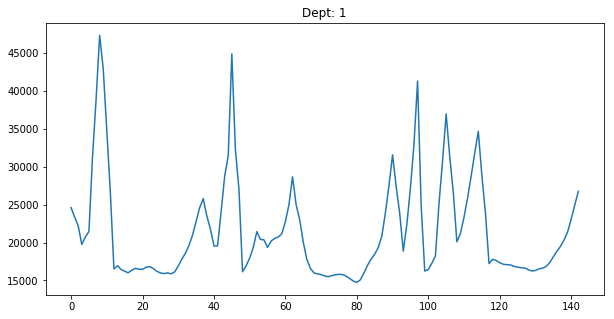

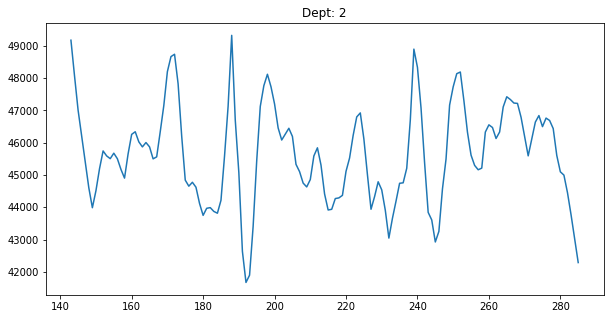

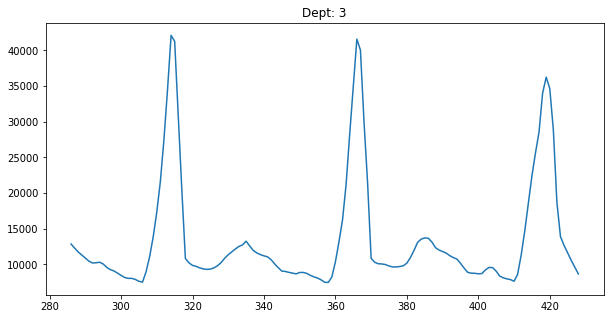

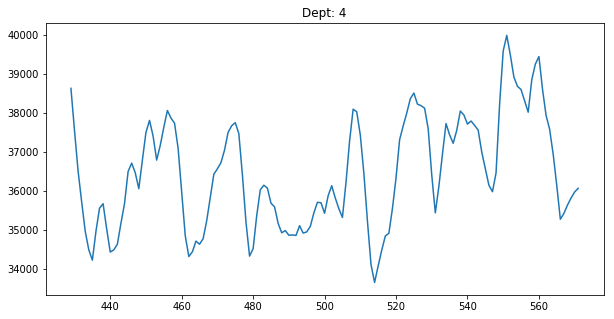

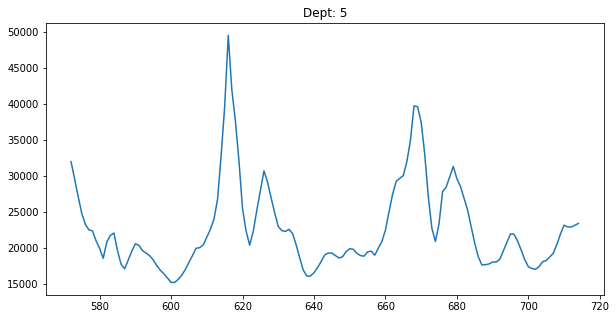

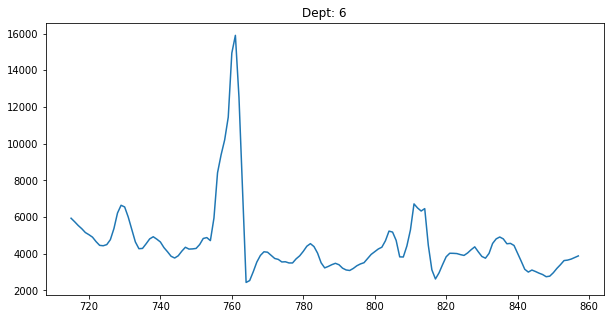

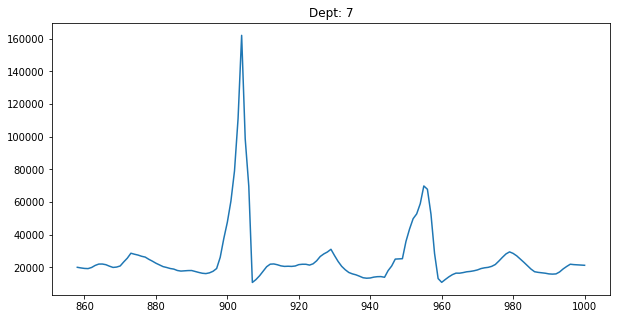

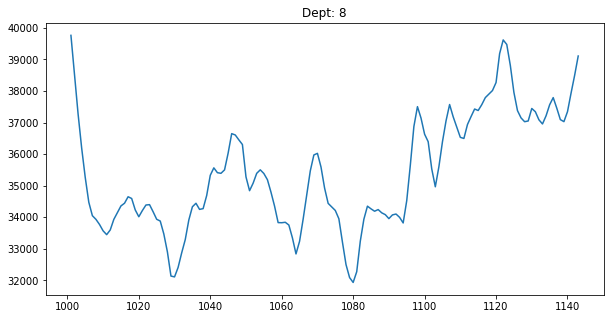

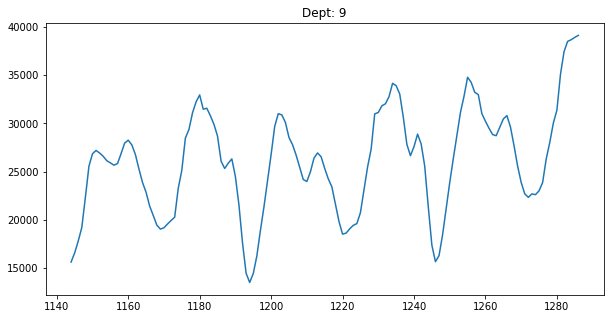

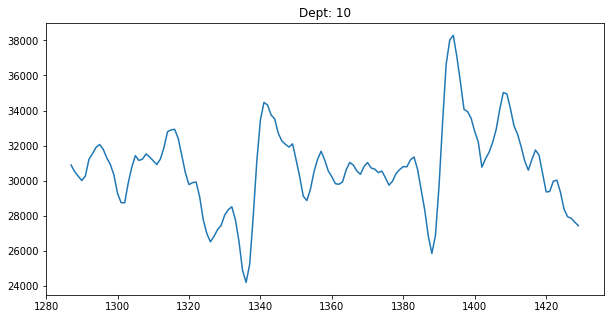

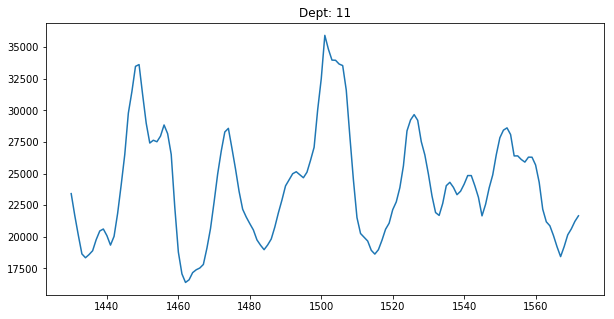

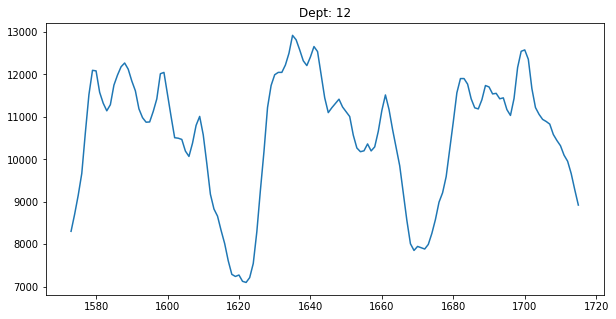

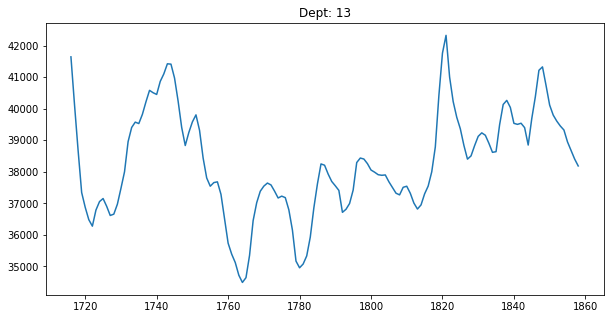

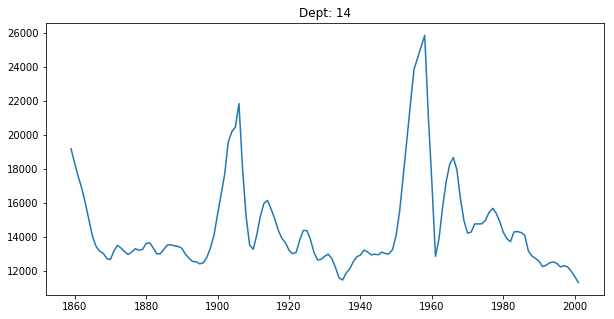

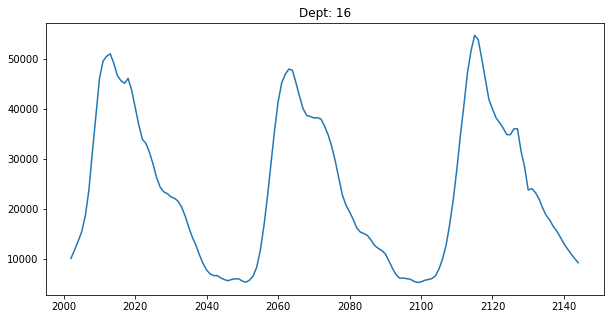

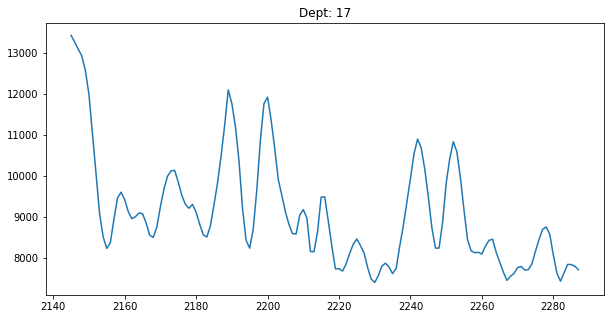

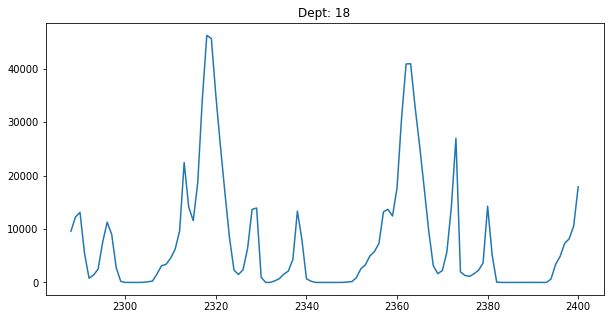

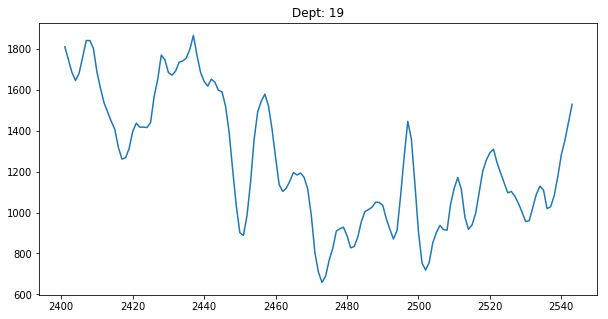

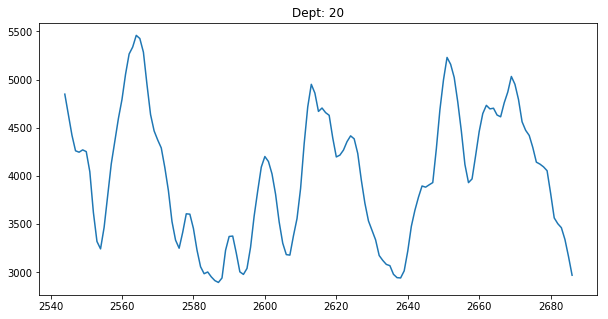

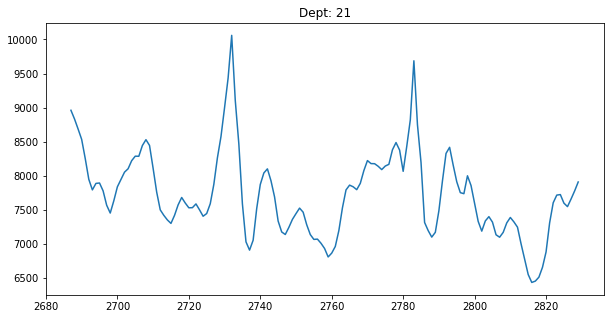

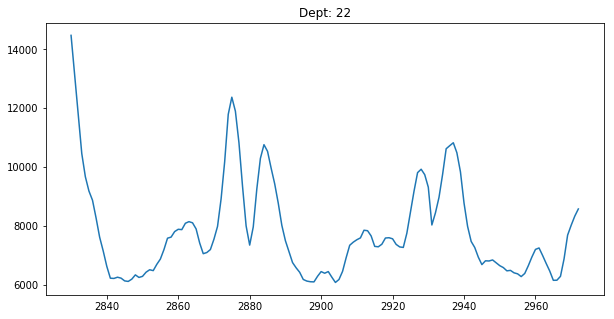

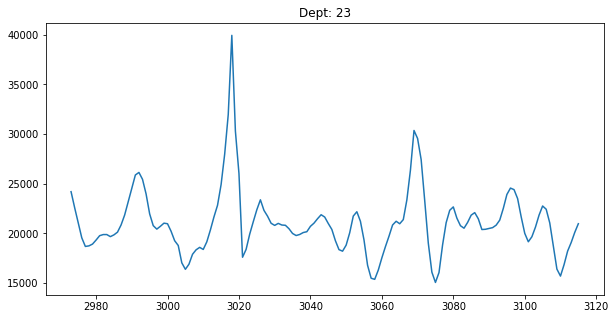

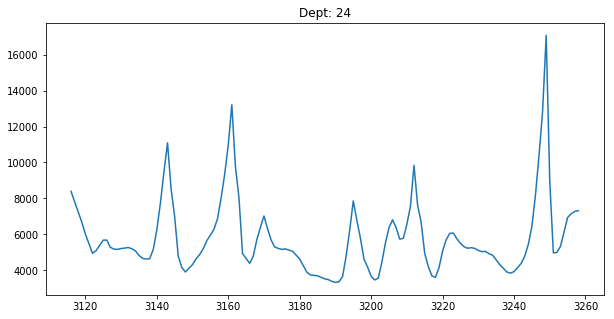

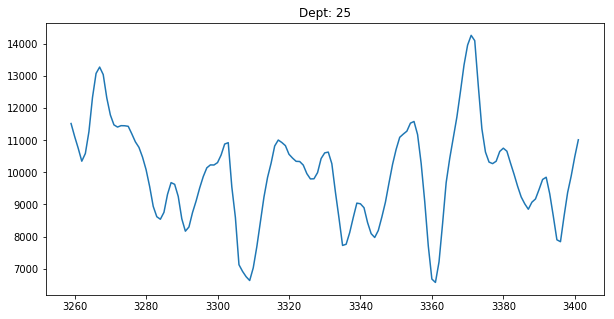

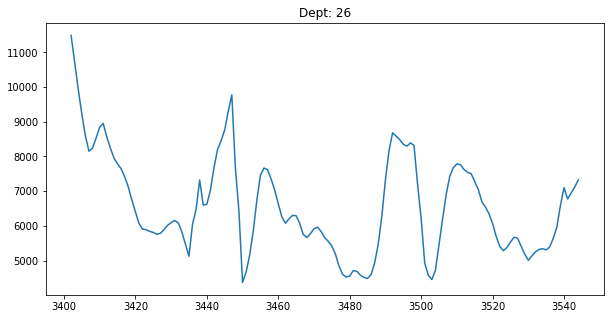

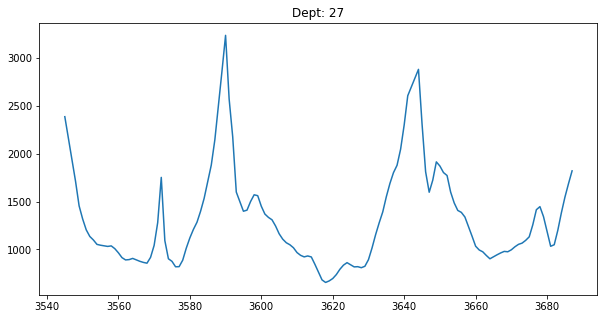

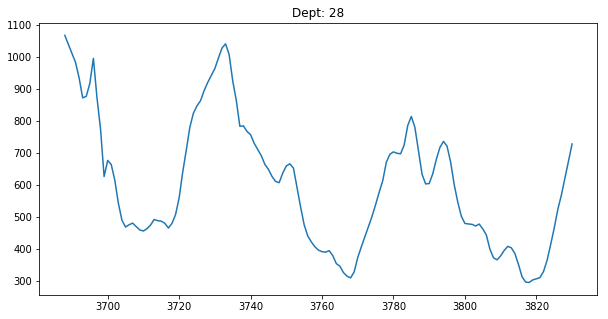

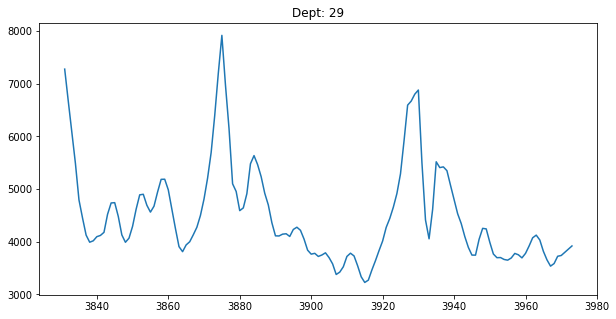

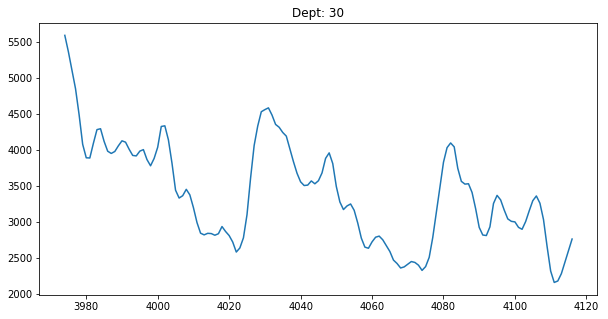

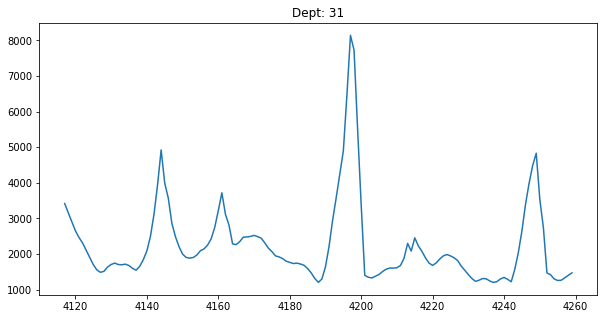

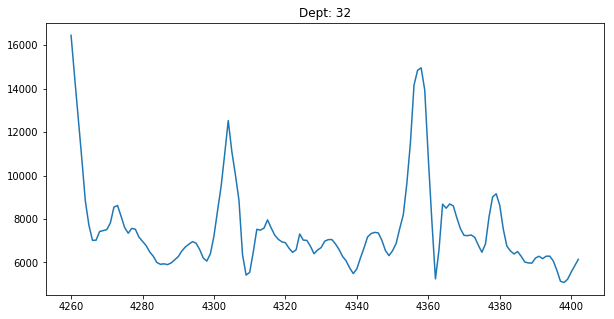

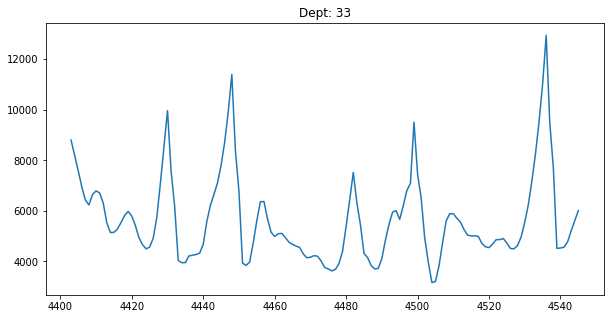

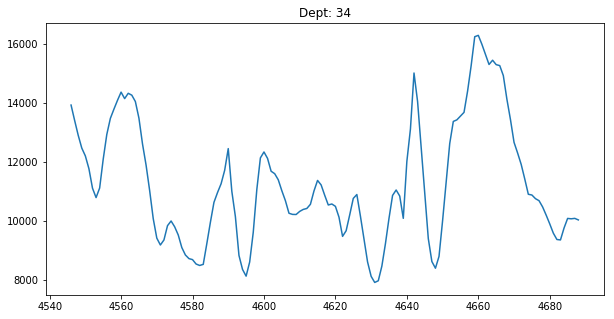

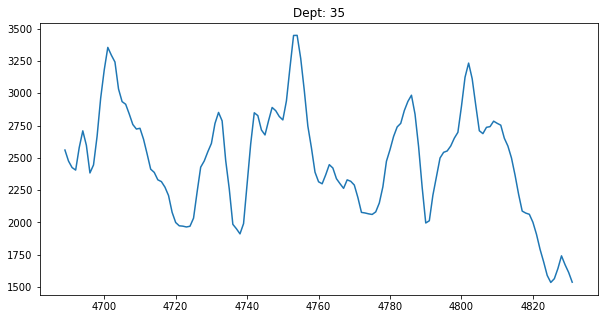

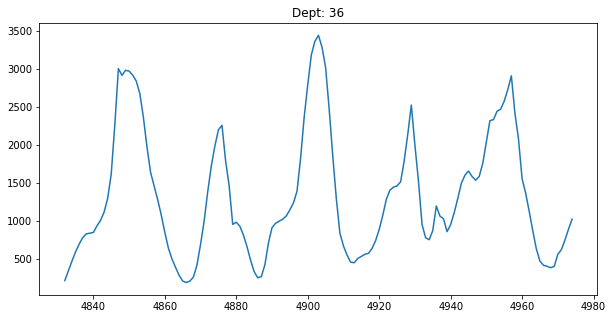

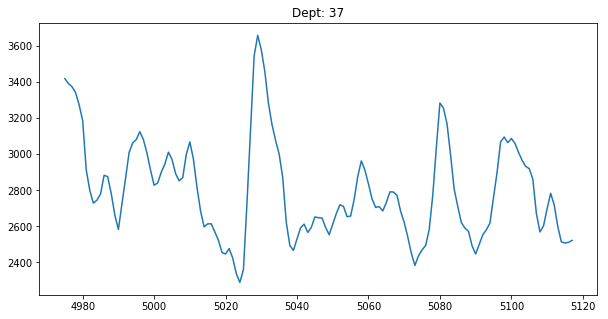

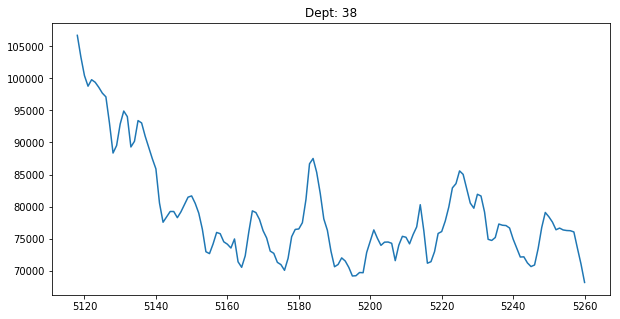

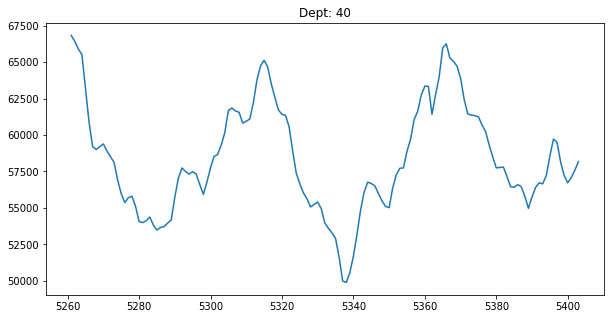

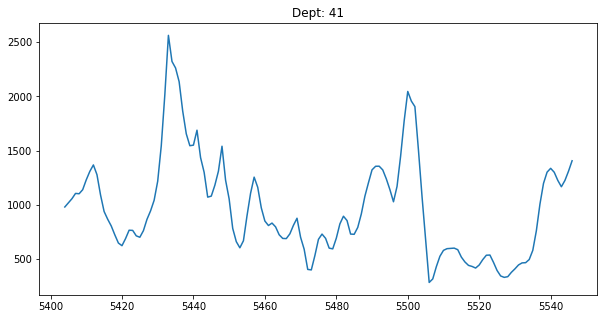

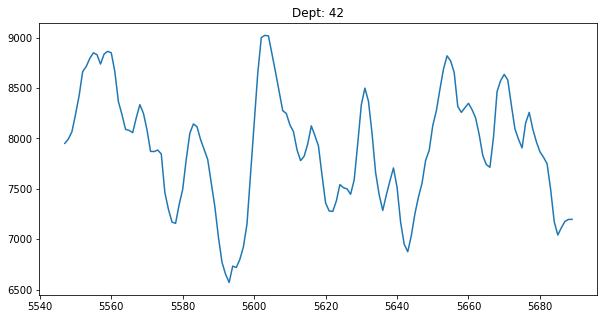

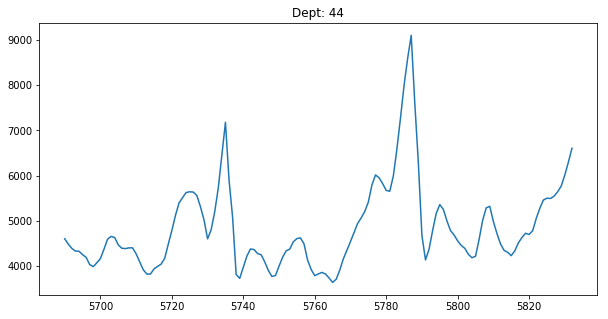

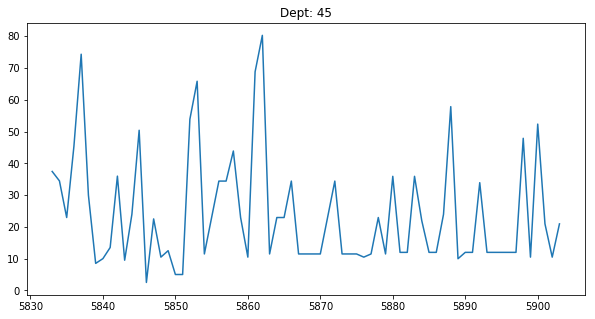

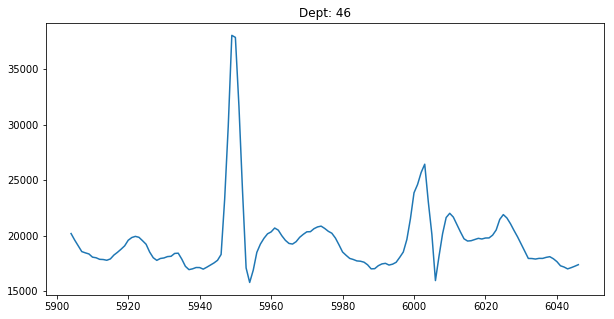

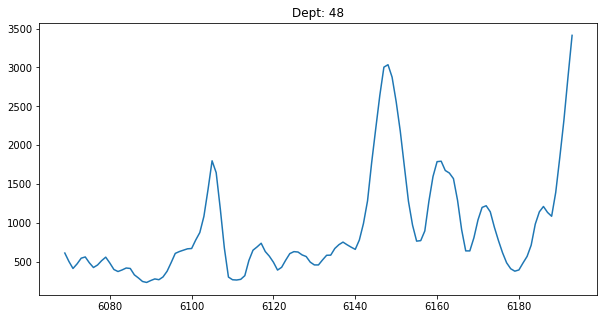

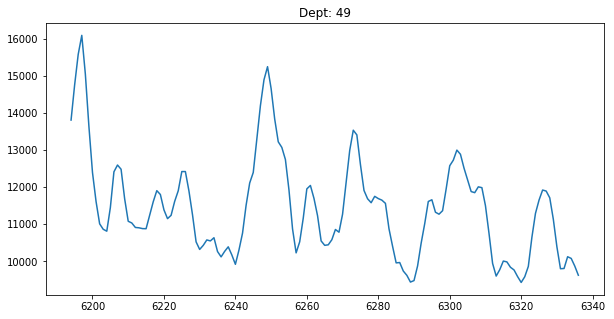

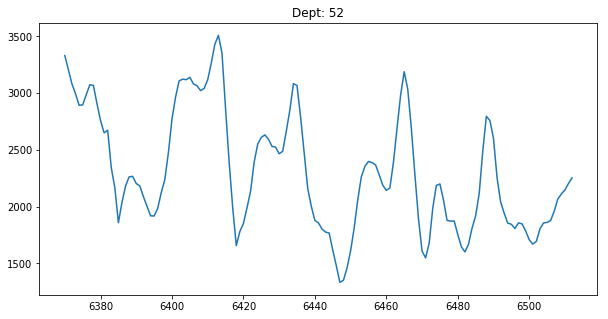

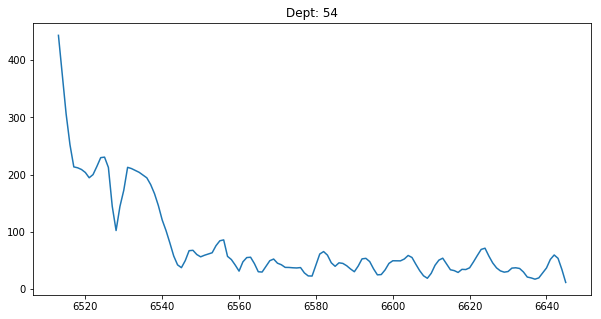

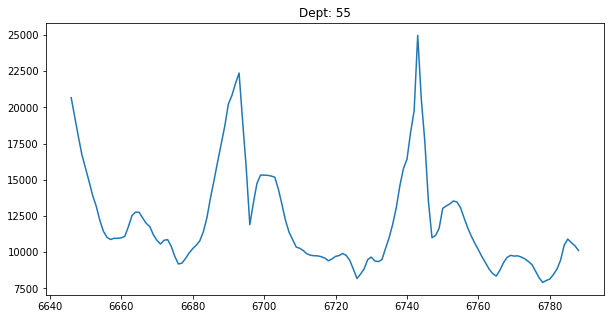

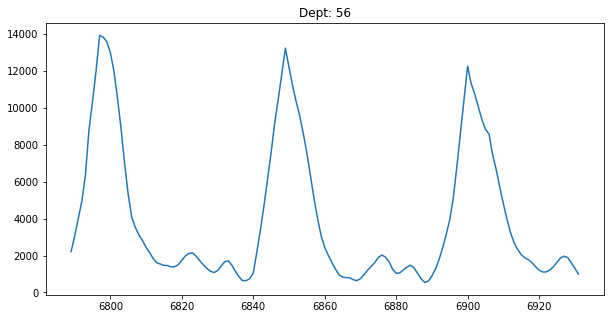

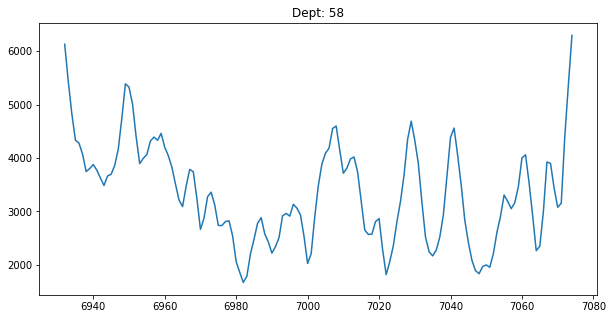

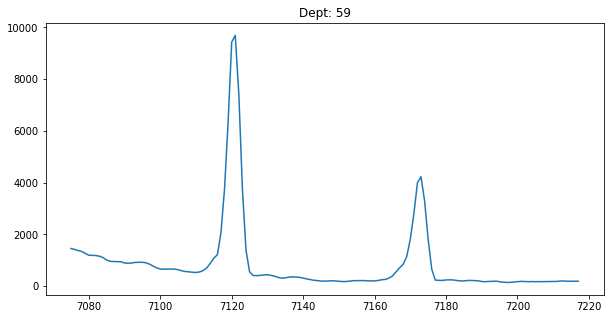

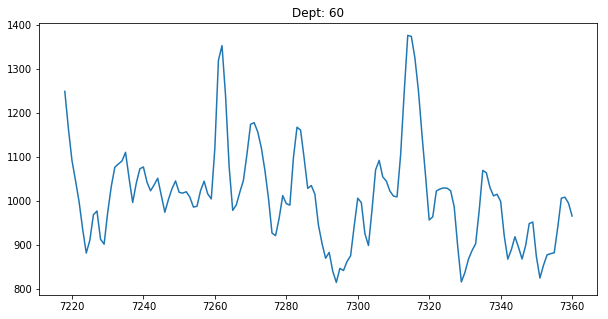

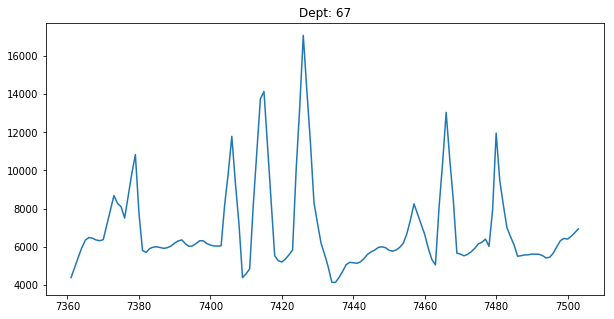

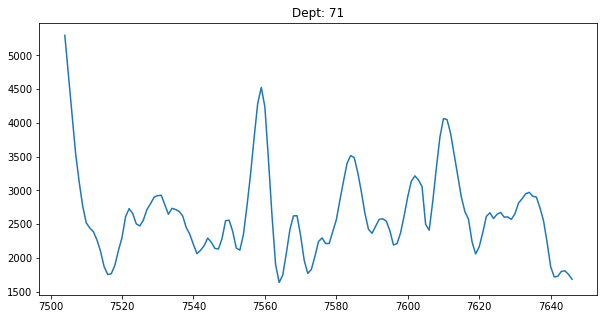

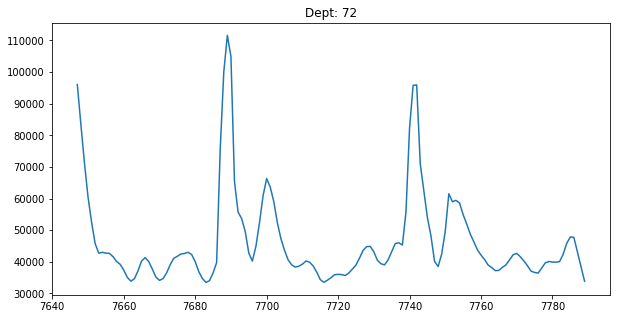

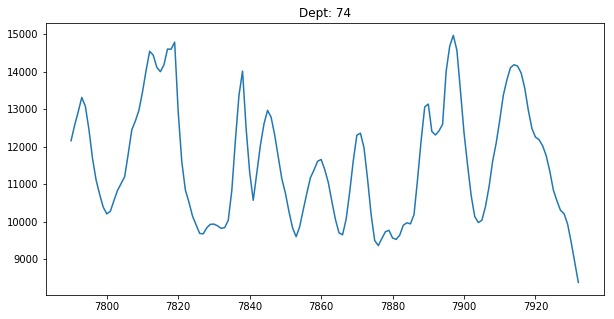

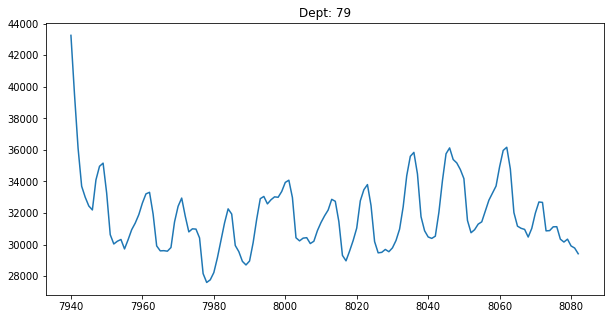

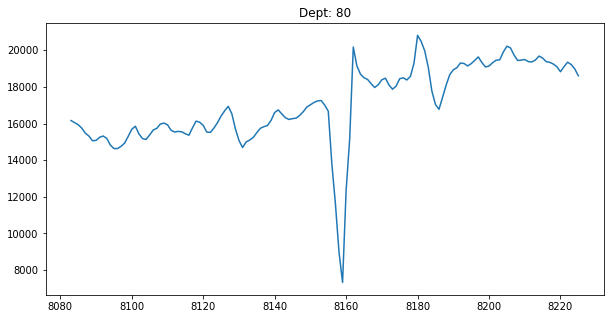

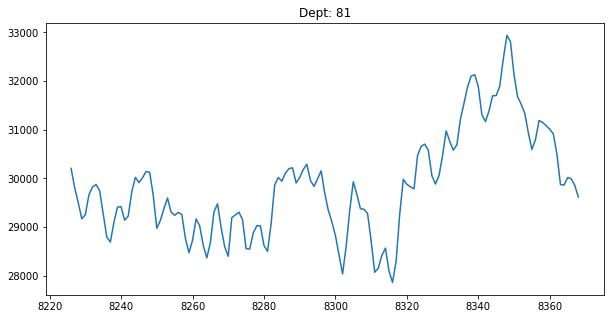

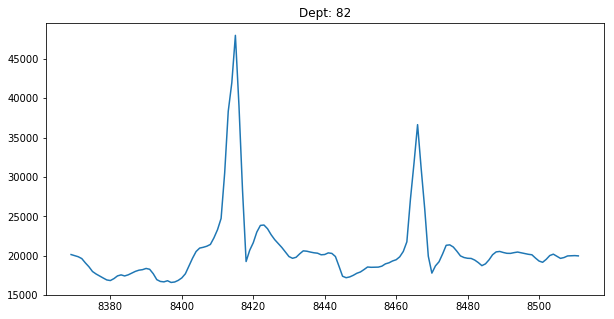

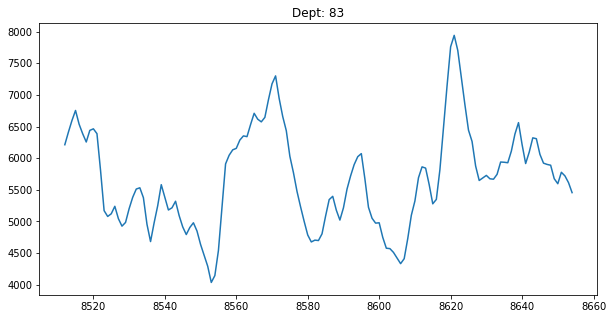

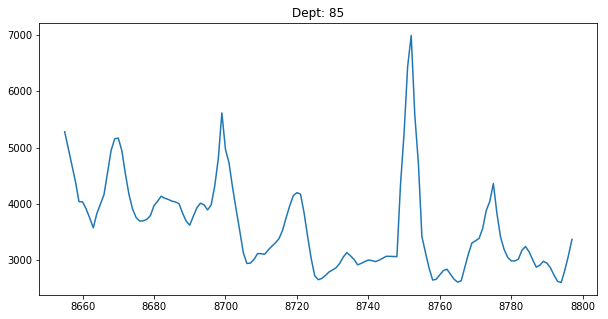

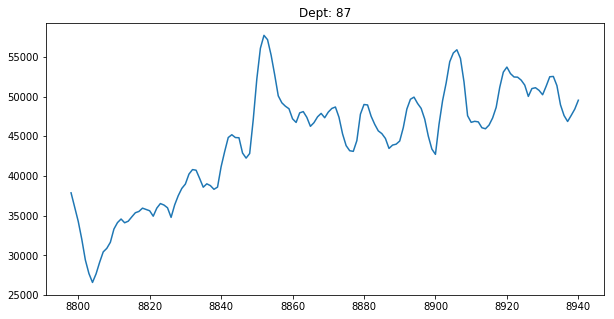

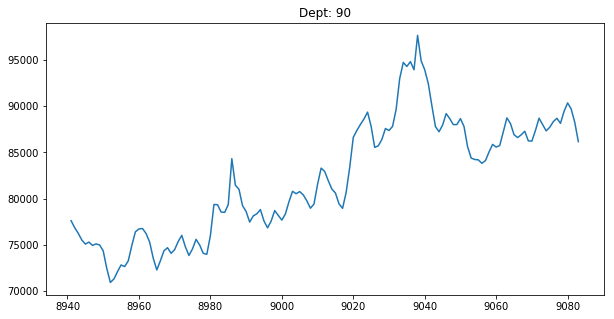

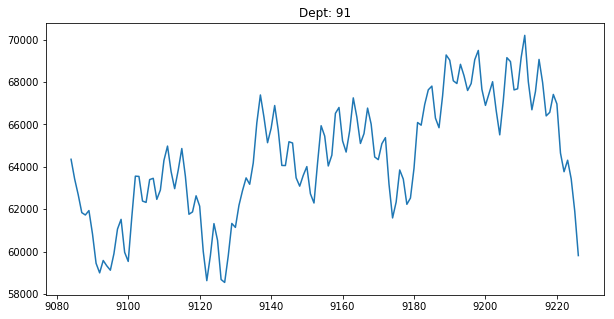

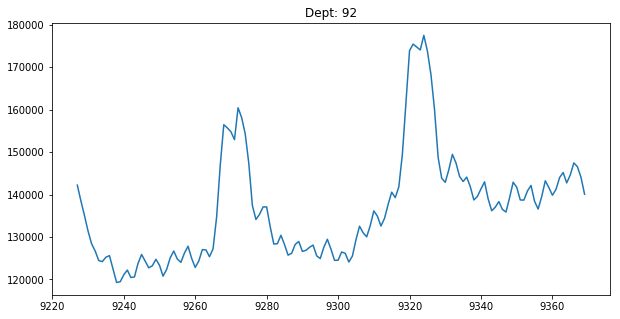

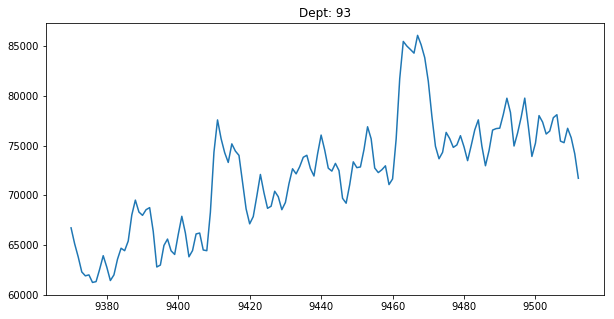

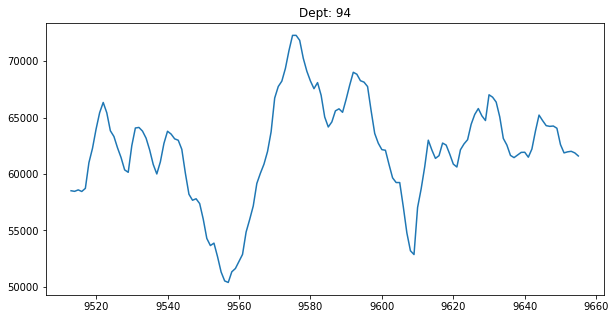

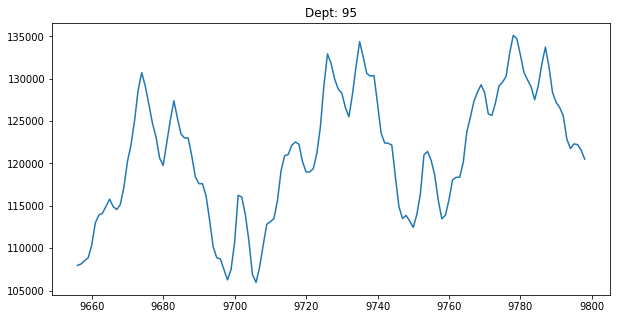

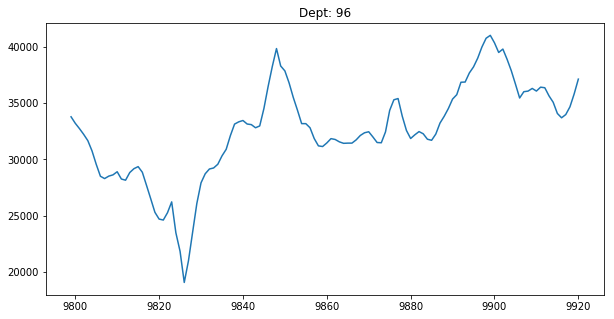

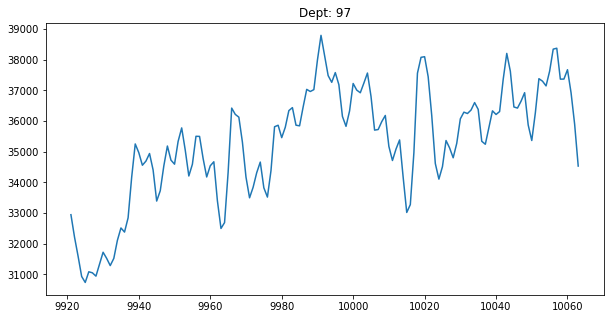

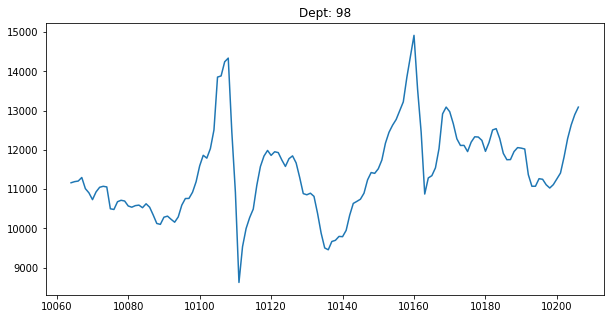

In [128]:
for d in y.Dept.unique():
    plt.figure(figsize=(10,5))
    y_sale = y.loc[y.Dept==d].y
    plt.title('Dept: '+str(d))
    plt.plot(y_sale)

In [91]:
# see each dept difference
dept1 =  y.loc[y.Dept==1].y

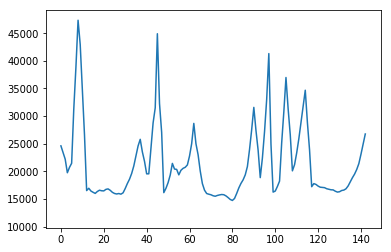

In [99]:
plt.plot(dept1)
plt.plot(ypred[0])

In [102]:
dept2 =  y.loc[y.Dept==2].y

In [103]:
naive_test[0][1]

43033.4438859618

In [104]:
ypred[1]

20841.34

In [107]:
dept2.values[-1]

42286.353074158484

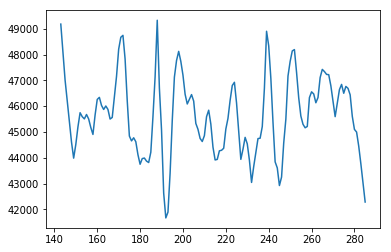

In [112]:
plt.plot(dept2)
# plt.plot(ypred[1])

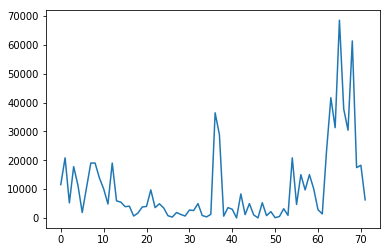

In [113]:
plt.plot(ypred)

In [114]:
depts

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 48, 49, 52, 54, 55, 56, 58, 59,
       60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92, 93, 94,
       95, 96, 97, 98])

In [129]:
dept97 =  y.loc[y.Dept==97].y.values

In [135]:
X_train.shape

(1, 4711, 60)

In [130]:
ypred[-2]

18270.871

In [131]:
naive_test[0][-2]

35895.904896808766

In [118]:
dept92 =  y.loc[y.Dept==92].y

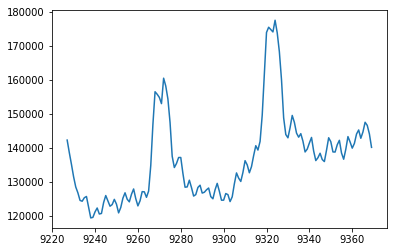

In [119]:
plt.plot(dept92)

In [120]:
ypred[-7]

68559.56

In [123]:
naive_test[0][-7]

144042.58972515466

In [126]:
dept92.values[-1]

140077.22267705854

In [140]:
#lstm input
x = np.load('/Users/rita/Documents/kaggle/retail-data-analytics/np/lstm/uni_lstm_X_train.npy').item()

In [146]:
x[1].shape

(9637, 7)

In [ ]:
mae